<div style="background-color:gray; padding:10px;">
  <center>  <h1 style="color:White">Data Cleaning & Visualization</h1></center>
</div>

<div style="background-color:gray; padding:5px;">
    <h2 style="color:White">Import Libraries</h2>
</div>

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import random
import matplotlib.pyplot as plt

<div style="background-color:gray; padding:5px;">
    <h2 style="color:White">Step 1: Data Creation and Loading</h2>
</div>

In [2]:
# step-1 >> Creating Synthetic data and loading it
# columns also called features

data = {
        "patient_id" : [1,2,3,4,5,6,7,8],
        "name" :["AB","BC","CD","DE","EF","FG","GH","HI"],
        "age" :[34,np.nan,44,64,34,np.nan,45,55] ,
        "gender":["M","F","F","M","M","M","F","F"],
        "blood_presssure" :["120/80",None,"140/90","abc","130/85","135/80","120/80","130/80"],
        "diagnosis":["Hypertention","Diabetes","None","Diabetes","hypertention","HYPERTENTION",None,"pre-Diabetic"],
        "date_of_visit":["2024-01-18","203/01/18","20230118","2022-01-18","2023-01-18","2023-01-18","2023/01/18","20230118"]
}

<div style="background-color:gray; padding:5px;">
    <h2 style="color:White">Step 2: Load into DataFrame</h2>
</div>

In [3]:
df = pd.DataFrame(data)
df

,patient_id,name,age,gender,blood_presssure,diagnosis,date_of_visit
0,1,AB,34.0,M,120/80,Hypertention,2024-01-18
1,2,BC,NaN,F,None,Diabetes,203/01/18
2,3,CD,44.0,F,140/90,None,20230118
3,4,DE,64.0,M,abc,Diabetes,2022-01-18
4,5,EF,34.0,M,130/85,hypertention,2023-01-18
5,6,FG,NaN,M,135/80,HYPERTENTION,2023-01-18
6,7,GH,45.0,F,120/80,None,2023/01/18
7,8,HI,55.0,F,130/80,pre-Diabetic,20230118


<div style="background-color:gray; padding:5px;">
    <h2 style="color:White">Step 3: Cleaning Individual Columns</h2>
</div>

<div style="background-color:gray; padding:4px;">
    <h3 style="color:White">Normalize Diagnosis</h3>
</div>

In [4]:
df['diagnosis'] = df['diagnosis'].str.lower().str.strip()
df

,patient_id,name,age,gender,blood_presssure,diagnosis,date_of_visit
0,1,AB,34.0,M,120/80,hypertention,2024-01-18
1,2,BC,NaN,F,None,diabetes,203/01/18
2,3,CD,44.0,F,140/90,none,20230118
3,4,DE,64.0,M,abc,diabetes,2022-01-18
4,5,EF,34.0,M,130/85,hypertention,2023-01-18
5,6,FG,NaN,M,135/80,hypertention,2023-01-18
6,7,GH,45.0,F,120/80,None,2023/01/18
7,8,HI,55.0,F,130/80,pre-diabetic,20230118


In [5]:
df.replace({'diagnosis': {"none": np.nan, "": np.nan, "null": np.nan}}, inplace=True)
df

,patient_id,name,age,gender,blood_presssure,diagnosis,date_of_visit
0,1,AB,34.0,M,120/80,hypertention,2024-01-18
1,2,BC,NaN,F,None,diabetes,203/01/18
2,3,CD,44.0,F,140/90,NaN,20230118
3,4,DE,64.0,M,abc,diabetes,2022-01-18
4,5,EF,34.0,M,130/85,hypertention,2023-01-18
5,6,FG,NaN,M,135/80,hypertention,2023-01-18
6,7,GH,45.0,F,120/80,None,2023/01/18
7,8,HI,55.0,F,130/80,pre-diabetic,20230118


<div style="background-color:gray; padding:4px;">
    <h3 style="color:White">Impute Missing Ages</h3>
</div>

In [6]:
# filling nan in age feature
df["age"] = df['age'].fillna(df['age'].mean())
df

,patient_id,name,age,gender,blood_presssure,diagnosis,date_of_visit
0,1,AB,34.0,M,120/80,hypertention,2024-01-18
1,2,BC,46.0,F,None,diabetes,203/01/18
2,3,CD,44.0,F,140/90,NaN,20230118
3,4,DE,64.0,M,abc,diabetes,2022-01-18
4,5,EF,34.0,M,130/85,hypertention,2023-01-18
5,6,FG,46.0,M,135/80,hypertention,2023-01-18
6,7,GH,45.0,F,120/80,None,2023/01/18
7,8,HI,55.0,F,130/80,pre-diabetic,20230118


<div style="background-color:gray; padding:4px;">
    <h3 style="color:White">Clean Blood Pressure</h3>
</div>

In [7]:
df["blood_presssure"].where(df["blood_presssure"].str.contains(r'^\d+/\d+$'))

0    120/80
1       NaN
2    140/90
3       NaN
4    130/85
5    135/80
6    120/80
7    130/80
Name: blood_presssure, dtype: object

<div style="background-color:gray; padding:4px;">
    <h3 style="color:White">Parse Dates</h3>
</div>

In [8]:
df['date_of_visit'] = pd.to_datetime(df['date_of_visit'],errors='coerce')
df

,patient_id,name,age,gender,blood_presssure,diagnosis,date_of_visit
0,1,AB,34.0,M,120/80,hypertention,2024-01-18
1,2,BC,46.0,F,None,diabetes,NaT
2,3,CD,44.0,F,140/90,NaN,NaT
3,4,DE,64.0,M,abc,diabetes,2022-01-18
4,5,EF,34.0,M,130/85,hypertention,2023-01-18
5,6,FG,46.0,M,135/80,hypertention,2023-01-18
6,7,GH,45.0,F,120/80,None,NaT
7,8,HI,55.0,F,130/80,pre-diabetic,NaT


<div style="background-color:gray; padding:4px;">
    <h3 style="color:White">Exact Duplicate Termination</h3>
</div>

In [9]:
df.drop_duplicates(inplace=True)
df

,patient_id,name,age,gender,blood_presssure,diagnosis,date_of_visit
0,1,AB,34.0,M,120/80,hypertention,2024-01-18
1,2,BC,46.0,F,None,diabetes,NaT
2,3,CD,44.0,F,140/90,NaN,NaT
3,4,DE,64.0,M,abc,diabetes,2022-01-18
4,5,EF,34.0,M,130/85,hypertention,2023-01-18
5,6,FG,46.0,M,135/80,hypertention,2023-01-18
6,7,GH,45.0,F,120/80,None,NaT
7,8,HI,55.0,F,130/80,pre-diabetic,NaT


<div style="background-color:gray; padding:4px;">
    <h3 style="color:White">Deleting NaN</h3>
</div>

In [10]:
df.dropna(subset=['blood_presssure','date_of_visit'],inplace=True)
df

,patient_id,name,age,gender,blood_presssure,diagnosis,date_of_visit
0,1,AB,34.0,M,120/80,hypertention,2024-01-18
3,4,DE,64.0,M,abc,diabetes,2022-01-18
4,5,EF,34.0,M,130/85,hypertention,2023-01-18
5,6,FG,46.0,M,135/80,hypertention,2023-01-18


<div style="background-color:gray; padding:5px;">
    <h1 style="color:White">Visualization : Plotting Graphs</h1>
</div>

<div style="background-color:gray; padding:4px;">
    <h3 style="color:White">Histogram of Age</h3>
</div>

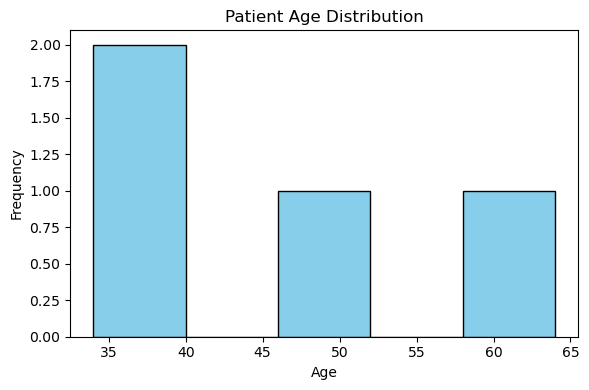

In [25]:
plt.figure(figsize=(6, 4))
plt.hist(df['age'], bins=5, color='skyblue', edgecolor='black')
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

<div style="background-color:gray; padding:4px;">
    <h3 style="color:White">Pie Chart of Diagnosis Proportion</h3>
</div>

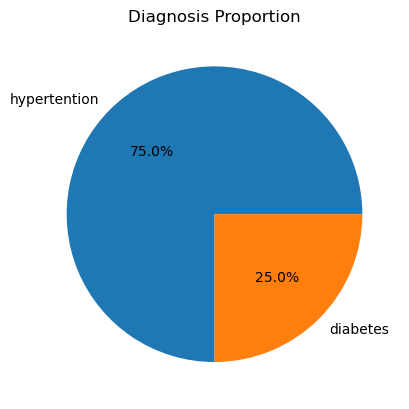

In [26]:
df['diagnosis'].value_counts(dropna=False).plot(
    kind='pie', 
    autopct='%1.1f%%'
)
plt.title("Diagnosis Proportion")
plt.ylabel('')
plt.show()


<div style="background-color:gray; padding:4px;">
    <h3 style="color:White">Boxplot of age</h3>
</div>

<Figure size 500x400 with 0 Axes>

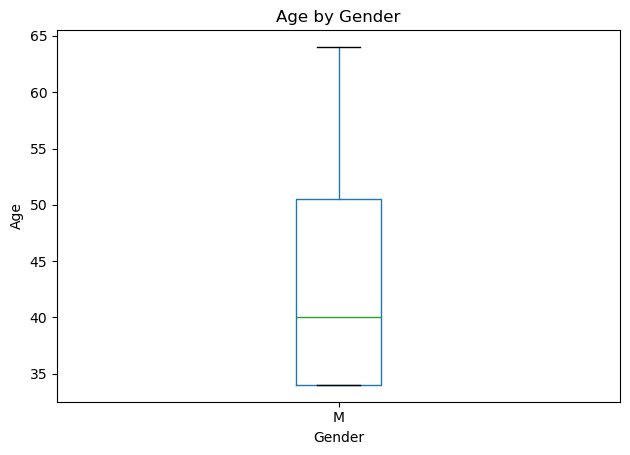

In [27]:
plt.figure(figsize=(5,4))
df.boxplot(column='age', by='gender', grid=False)
plt.title('Age by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.show()